In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits.axes_grid1.parasite_axes import HostAxes

In [2]:
t = pd.read_pickle('C:\\Users\\gamak\\Documents\\Papers\\Stars\\GAIA_binaries.pkl')

In [3]:
x = t.bp_rp # choose column X from table
y = t.MG # choose column Y from table
x1 = t.bp_rp2
y1 = t.MG2

In [3]:
i = t.bp_rp2 != 1.000000e+20
i.sum()

7231

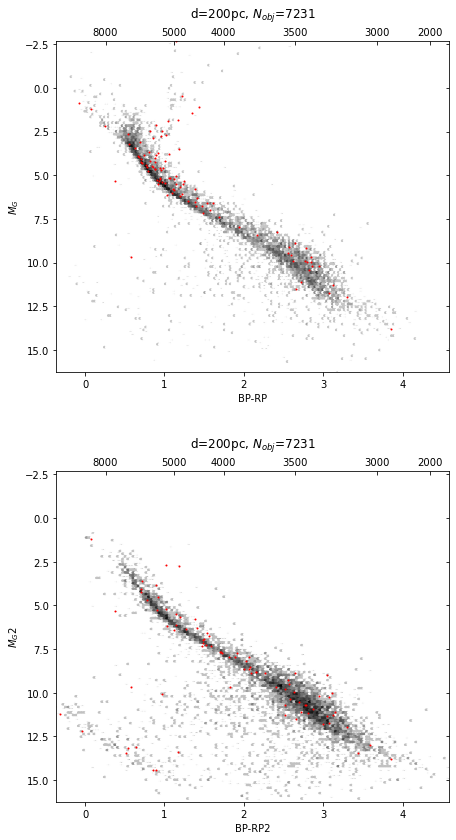

In [18]:
xmin = x.min() # margins of the plot
xmax = x.max()
ymin = y.min()
ymax = y.max()


fig, axs = plt.subplots(ncols=1, nrows=2, sharey=False, figsize=(6.5, 14),subplot_kw={'axes_class':HostAxes})
fig.subplots_adjust(hspace=0.3, left=0.15, right=0.99)
ax = axs[0]

hb = ax.hexbin(x[i], y[i], gridsize=200, bins='log', cmap='gray_r') # see info here 
# https://matplotlib.org/stable/gallery/statistics/hexbin_demo.html#sphx-glr-gallery-statistics-hexbin-demo-py
# and in help
ax.plot(x.iloc[:100],y.iloc[:100],'ro', markersize = 1)
ax.set(xlim=(xmin, xmax), ylim=(ymax, ymin), xlabel = 'BP-RP',ylabel = '$M_G$')
ax.set_title("d=200pc, $N_{obj}$=7231",y=1.05)

ax2 = ax.twin()  # ax2 is responsible for "top" axis and "right" axis
ax2.set_xticks([4.34, 3.68, 2.64, 1.745,1.117,.2575,-.5133])#,-0.1
ax2.set_xticklabels([2000,3000,3500,4000,5000,8000,13000])#,10000
ax2.tick_params(direction='in')
ax2.axis["right"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticklabels.set_visible(True)

ax = axs[1]
hb1 = ax.hexbin(x1[i], y1[i], gridsize=200, bins='log', cmap='gray_r') # see info here 
# https://matplotlib.org/stable/gallery/statistics/hexbin_demo.html#sphx-glr-gallery-statistics-hexbin-demo-py
# and in help
ax.plot(x1.iloc[:100],y1.iloc[:100],'ro', markersize = 1)
ax.set(xlim=(xmin, xmax), ylim=(ymax, ymin), xlabel = 'BP-RP2',ylabel = '$M_G$2')
ax.set_title("d=200pc, $N_{obj}$=7231",y=1.05)

ax2 = ax.twin()  # ax2 is responsible for "top" axis and "right" axis
ax2.set_xticks([4.34, 3.68, 2.64, 1.745,1.117,.2575,-.5133])#,-0.1
ax2.set_xticklabels([2000,3000,3500,4000,5000,8000,13000])#,10000
ax2.tick_params(direction='in')
ax2.axis["right"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticklabels.set_visible(True)
plt.savefig('GAIA_binaries_HRD.jpeg', dpi=300)

In [4]:
x = t.Teff[i] # choose column X from table
y = t.Teff2[i] # choose column Y from table

In [59]:
j= y < 11000
y1 = y[j]
x1 = x[j]
k = y1 > 2000

j.sum()

7224

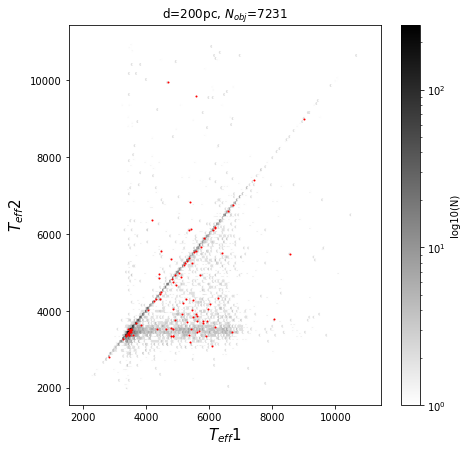

In [61]:
fig1 = plt.figure(figsize=(7, 7))


hb = plt.hexbin(x[j], y[j], gridsize=200, bins='log', cmap='gray_r', extent=(2000,11000,2000,11000)) # see info here 
# https://matplotlib.org/stable/gallery/statistics/hexbin_demo.html#sphx-glr-gallery-statistics-hexbin-demo-py
# and in help
plt.xlabel('$T_{eff}$1', size = 15)
plt.ylabel('$T_{eff}$2', size = 15)
plt.plot(x1[k].iloc[:100],y1[k].iloc[:100],'ro', markersize = 1)

plt.title("d=200pc, $N_{obj}$=7231")

cb = fig1.colorbar(hb)
cb.set_label('log10(N)')
plt.savefig('C:\\Users\\gamak\\Documents\\Papers\\Stars\\Teff1-2.jpeg', dpi=300)

In [62]:
t.columns

Index(['hpidx', 'source_id', 'ra1', 'dec1', 'ra2', 'dec2', 'pairdistance',
       'sep_AU', 'binary_type', 'Sigma18', 'R_chance_align', 'ML_FLUX_0', 'MG',
       'bp_rp', 'bp_rp1', 'bp_rp2', 'Fbol', 'Log(Fx/Fo)', 'Lx', 'Lbol', 'Teff',
       'dist_pc', 'parallax1', 'parallax2', 'phot_g_mean_mag2', 'MG2', 'Fbol2',
       'Log(Fx/Fo)2', 'Lbol2', 'Teff2'],
      dtype='object')

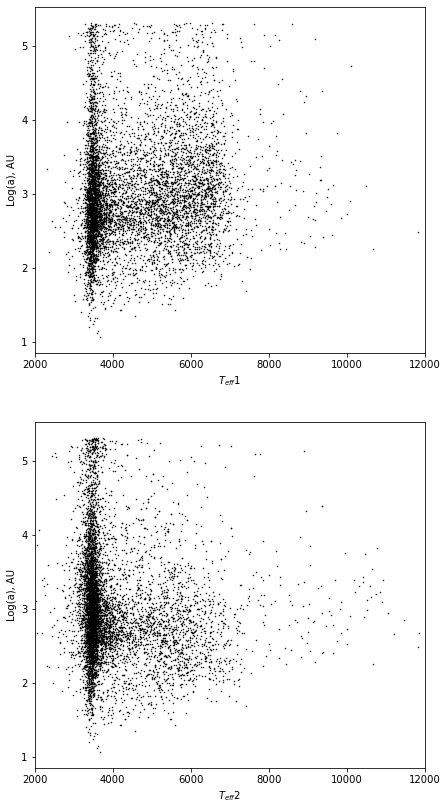

In [7]:
fig2, axs = plt.subplots(nrows=2,ncols=1,figsize=(7,14))

ax = axs[0]
ax.plot(t.Teff[i],np.log10(t.sep_AU[i]),'ko', markersize=.5)
ax.set(xlim=(2000,12000), xlabel = '$T_{eff}$1', ylabel = 'Log(a), AU')

ax= axs[1]
ax.plot(t.Teff2[i],np.log10(t.sep_AU[i]),'ko' , markersize=.5)
ax.set(xlim=(2000,12000), xlabel = '$T_{eff}$2', ylabel = 'Log(a), AU')
plt.savefig('C:\\Users\\gamak\\Documents\\Papers\\Stars\\Separation_Teff.jpeg', dpi=300)

In [76]:
pd.get_dummies(t.binary_type).sum()

MS??    1826
MSMS    6991
WD??       1
WDMS     238
WDWD       1
dtype: int64